In [13]:
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt

In [14]:

# Define the augmentation pipeline with bounding boxes
transform = A.Compose([
    A.HorizontalFlip(p=1),  # 100% chance of flipping the image
    A.Rotate(limit=40, p=0.5),  # 50% chance of rotating the image by up to 40 degrees
    A.Resize(width=410, height=416),  # Resize the image
    ToTensorV2()  # Convert to Tensor (if using for PyTorch)
], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']))


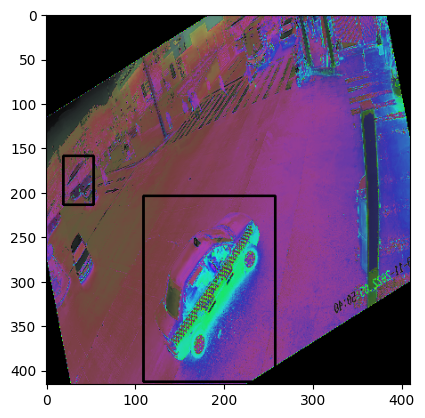

In [24]:

# Example of image and bounding boxes in YOLO format (x_center, y_center, width, height)
image = cv2.imread("../data/dataset/images/video1_frame_1.png")
bboxes = [[0.59471, 0.69869, 0.31857, 0.33333], [0.87906, 0.21276, 0.06735, 0.09871]]  # YOLO format: [x_center, y_center, width, height]
category_ids = [0, 1]  # Example categories (class labels)

# Apply augmentation
augmented = transform(image=image, bboxes=bboxes, category_ids=category_ids)

# Get the augmented image and bounding boxes
augmented_image = augmented['image']
augmented_bboxes = augmented['bboxes']

# Convert the tensor back to NumPy array for OpenCV
augmented_image = augmented_image.permute(1, 2, 0).numpy()  # Convert from (C, H, W) to (H, W, C)
augmented_image = (augmented_image * 255).astype('uint8')  # Scale to 0-255 for OpenCV

# Visualize the augmented image with bounding boxes
for box in augmented_bboxes:
    x_center, y_center, w, h = box
    xtl = int((x_center - w / 2) * augmented_image.shape[1])
    ytl = int((y_center - h / 2) * augmented_image.shape[0])
    xbr = int((x_center + w / 2) * augmented_image.shape[1])
    ybr = int((y_center + h / 2) * augmented_image.shape[0])
    
    # Draw bounding box
    augmented_image = cv2.rectangle(augmented_image, (xtl, ytl), (xbr, ybr), (0, 255, 0), 2)

# Convert to RGB for displaying with plt
augmented_image = cv2.cvtColor(augmented_image, cv2.COLOR_HSV2BGR)

# Show the augmented image
plt.imshow(augmented_image)
plt.show()

